In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.use("Agg")
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import random
import cv2
import os

In [2]:
dataset = 'C:/Users/murta/Downloads/archive/Data/images_original'
learning_rate = 1e-3
data = []
labels = []
image_paths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(image_paths)

for image in image_paths:
    img = cv2.imread(image)
    img = img_to_array(image)
    data.append(img)
    label = image.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)

labels = LabelBinarizer().fit_transform(labels)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = 42)
augment = ImageDataGenerator(rotation_range = 25, width_shift_range = 0.1, 
                         height_shift_range = 0.1, shear_range = 0.2, zoom_range = 0.2, 
                         horizontal_flip = True, fill_mode = 'nearest')

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (288, 432, 3))) #all input images are of dimensions (288, 432, 3)
model.add(Activation('relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis = 1))
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = learning_rate, decay = learning_rate / 1000), 
              metrics = ['accuracy'])

model_history = model.fit(x = augment.flow(x_train, y_train, batch_size = 32), validation_data = (x_test, y_test),
              steps_per_epoch = len(x_train)//32, epochs = 1000, verbose = 1)

Epoch 1/1000
250/250 [==============================] - 2s 5ms/step - loss: 1.3959 - accuracy: 0.5019 - val_loss: 0.9191 - val_accuracy: 0.6787
Epoch 2/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.9234 - accuracy: 0.6904 - val_loss: 0.7505 - val_accuracy: 0.7372
Epoch 3/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.7437 - accuracy: 0.7546 - val_loss: 0.6185 - val_accuracy: 0.7753
Epoch 4/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.6271 - accuracy: 0.7943 - val_loss: 0.5738 - val_accuracy: 0.8113
Epoch 5/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.5476 - accuracy: 0.8198 - val_loss: 0.5362 - val_accuracy: 0.8118
Epoch 6/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.4570 - accuracy: 0.8504 - val_loss: 0.4689 - val_accuracy: 0.8338
Epoch 7/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.4055 - accuracy: 0.8686 - val_loss: 0.4641 - val_accuracy:

250/250 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9885 - val_loss: 0.3809 - val_accuracy: 0.9199
Epoch 114/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.3566 - val_accuracy: 0.9229
Epoch 115/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.3606 - val_accuracy: 0.9254
Epoch 116/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0467 - accuracy: 0.9874 - val_loss: 0.3410 - val_accuracy: 0.9179
Epoch 117/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0450 - accuracy: 0.9876 - val_loss: 0.3570 - val_accuracy: 0.9249
Epoch 118/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.3604 - val_accuracy: 0.9284
Epoch 119/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9902 - val_loss: 0.4014 - val_accuracy: 

250/250 [==============================] - 1s 4ms/step - loss: 0.0276 - accuracy: 0.9921 - val_loss: 0.4636 - val_accuracy: 0.9224
Epoch 226/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.4113 - val_accuracy: 0.9279
Epoch 227/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.4079 - val_accuracy: 0.9294
Epoch 228/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0251 - accuracy: 0.9934 - val_loss: 0.4139 - val_accuracy: 0.9219
Epoch 229/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9904 - val_loss: 0.4200 - val_accuracy: 0.9239
Epoch 230/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 0.9921 - val_loss: 0.3910 - val_accuracy: 0.9234
Epoch 231/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.4126 - val_accuracy: 

250/250 [==============================] - 1s 4ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.3804 - val_accuracy: 0.9319
Epoch 338/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.4141 - val_accuracy: 0.9329
Epoch 339/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.4577 - val_accuracy: 0.9249
Epoch 340/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9916 - val_loss: 0.3651 - val_accuracy: 0.9344
Epoch 341/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0258 - accuracy: 0.9939 - val_loss: 0.4220 - val_accuracy: 0.9314
Epoch 342/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.4242 - val_accuracy: 0.9309
Epoch 343/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.3998 - val_accuracy: 

250/250 [==============================] - 1s 4ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.5177 - val_accuracy: 0.9329
Epoch 450/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0206 - accuracy: 0.9955 - val_loss: 0.4722 - val_accuracy: 0.9344
Epoch 451/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0292 - accuracy: 0.9926 - val_loss: 0.4422 - val_accuracy: 0.9309
Epoch 452/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0239 - accuracy: 0.9936 - val_loss: 0.5171 - val_accuracy: 0.9299
Epoch 453/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9925 - val_loss: 0.4560 - val_accuracy: 0.9284
Epoch 454/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0274 - accuracy: 0.9932 - val_loss: 0.4242 - val_accuracy: 0.9259
Epoch 455/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.4065 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.5684 - val_accuracy: 0.9309
Epoch 562/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0363 - accuracy: 0.9919 - val_loss: 0.5269 - val_accuracy: 0.9259
Epoch 563/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9936 - val_loss: 0.6286 - val_accuracy: 0.9269
Epoch 564/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.5592 - val_accuracy: 0.9284
Epoch 565/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.5475 - val_accuracy: 0.9274
Epoch 566/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0176 - accuracy: 0.9952 - val_loss: 0.5791 - val_accuracy: 0.9304
Epoch 567/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.5701 - val_accuracy: 

250/250 [==============================] - 1s 4ms/step - loss: 0.0202 - accuracy: 0.9949 - val_loss: 0.4804 - val_accuracy: 0.9384
Epoch 674/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9941 - val_loss: 0.6063 - val_accuracy: 0.9274
Epoch 675/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.5050 - val_accuracy: 0.9294
Epoch 676/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.4517 - val_accuracy: 0.9329
Epoch 677/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.4887 - val_accuracy: 0.9339
Epoch 678/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.5808 - val_accuracy: 0.9329
Epoch 679/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0310 - accuracy: 0.9950 - val_loss: 0.4914 - val_accuracy: 

250/250 [==============================] - 1s 5ms/step - loss: 0.0138 - accuracy: 0.9970 - val_loss: 0.5740 - val_accuracy: 0.9334
Epoch 786/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0293 - accuracy: 0.9944 - val_loss: 0.6080 - val_accuracy: 0.9304
Epoch 787/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0338 - accuracy: 0.9941 - val_loss: 0.5746 - val_accuracy: 0.9264
Epoch 788/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0231 - accuracy: 0.9957 - val_loss: 0.6226 - val_accuracy: 0.9229
Epoch 789/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0173 - accuracy: 0.9959 - val_loss: 0.6361 - val_accuracy: 0.9279
Epoch 790/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0203 - accuracy: 0.9951 - val_loss: 0.5798 - val_accuracy: 0.9309
Epoch 791/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0186 - accuracy: 0.9960 - val_loss: 0.6245 - val_accuracy: 

250/250 [==============================] - 1s 4ms/step - loss: 0.0194 - accuracy: 0.9955 - val_loss: 0.6443 - val_accuracy: 0.9299
Epoch 898/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.6600 - val_accuracy: 0.9319
Epoch 899/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.6202 - val_accuracy: 0.9314
Epoch 900/1000
250/250 [==============================] - 1s 4ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.5848 - val_accuracy: 0.9379
Epoch 901/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0169 - accuracy: 0.9971 - val_loss: 0.6024 - val_accuracy: 0.9349
Epoch 902/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0139 - accuracy: 0.9966 - val_loss: 0.5797 - val_accuracy: 0.9374
Epoch 903/1000
250/250 [==============================] - 1s 5ms/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.7168 - val_accuracy: 

In [8]:
plt.style.use('ggplot')
plt.figure()

plt.plot(np.arange(0, 1000), model_history.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 1000), model_history.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 1000), model_history.history['accuracy'], label = 'train_acc')
plt.plot(np.arange(0, 1000), model_history.history['val_accuracy'], label = 'val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc = 'upper left')
plt.savefig('C:/Users/murta/plot.png')

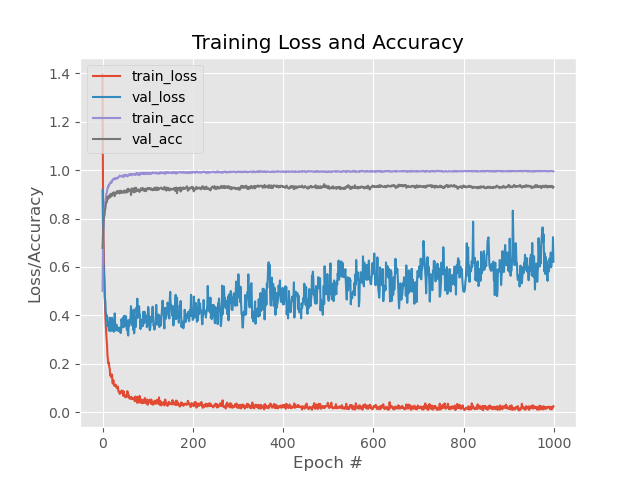

In [9]:
from IPython.display import Image
Image('C:/Users/murta/plot.png')